In [418]:
import numpy as np
import pandas as pd 
import time
import numpy as np
import tensorflow as tf 
from tensorflow.keras.layers import Dense , Input
import h5py
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from PIL import Image
from scipy import ndimage

from dnn_app_utils_v3 import *
from public_tests import *

In [419]:
df = pd.read_csv('archive/Cancer_Data.csv')
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


<Axes: >

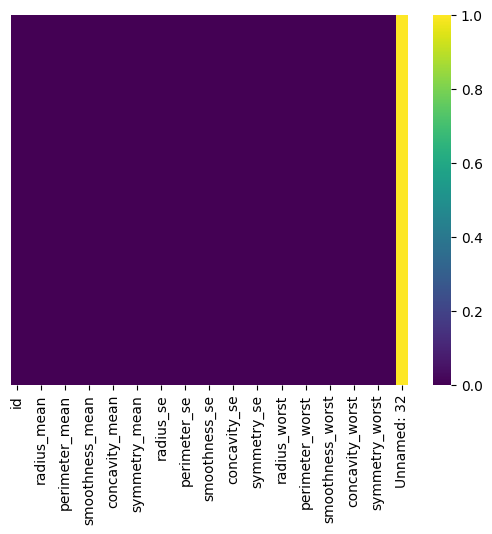

In [420]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [421]:

info_df = pd.DataFrame()
info_df['missing_val'] = df.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)
info_df


,missing_val,missing_val_ratio
id,0,0
diagnosis,0,0
radius_mean,0,0
texture_mean,0,0
perimeter_mean,0,0
area_mean,0,0
smoothness_mean,0,0
compactness_mean,0,0
concavity_mean,0,0
concave points_mean,0,0


In [422]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [423]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [424]:
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
label_binarizer.fit(s) # need to be global or remembered to use it later

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return label_binarizer.transform(x)  
d = one_hot_encode(s)       
df['label_encoding'] = d

In [425]:
df['label_encoding'].value_counts()

label_encoding
0    357
1    212
Name: count, dtype: int64

In [426]:
# X_raw = df[['area_se', 'perimeter_se', 'radius_se', 'compactness_worst',
#        'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
#        'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
#        'concave points_mean', 'perimeter_worst', 'concave points_worst']]
                  
# Define y_raw as the 'diagnosis' column                  
X = df[df.columns[2:-1]]
y = df['label_encoding']

In [427]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [428]:
# output = df['label_encoding']
# df.drop(columns=['label_encoding'],inplace=True)

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [430]:
X_train.shape

(426, 30)

In [431]:
y_train.shape

(426,)

In [432]:
df.drop(columns=['diagnosis'],inplace=True)

In [433]:
from tensorflow.keras.models import Sequential

In [434]:
model = Sequential()
model.add(Dense(units=30, activation='relu')),
model.add(Dense(units=15, activation='relu')),
model.add(Dense(units=1, activation='sigmoid')),
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [435]:
model.fit(x= X_train,y= y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100


14/14 [==============================] - 1s 41ms/step - loss: 0.6977 - accuracy: 0.6244 - val_loss: 0.6875 - val_accuracy: 0.6154
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.6291 - val_loss: 0.6636 - val_accuracy: 0.6154
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6338 - val_loss: 0.6357 - val_accuracy: 0.6294
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6151 - accuracy: 0.6761 - val_loss: 0.6012 - val_accuracy: 0.7203
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5772 - accuracy: 0.8005 - val_loss: 0.5616 - val_accuracy: 0.8462
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5369 - accuracy: 0.8404 - val_loss: 0.5207 - val_accuracy: 0.8252
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4964 - accuracy: 0.8521 - val_loss: 0.4756 - val_accuracy: 0.8951
Epoch 8/100
14/14 [====

<Axes: >

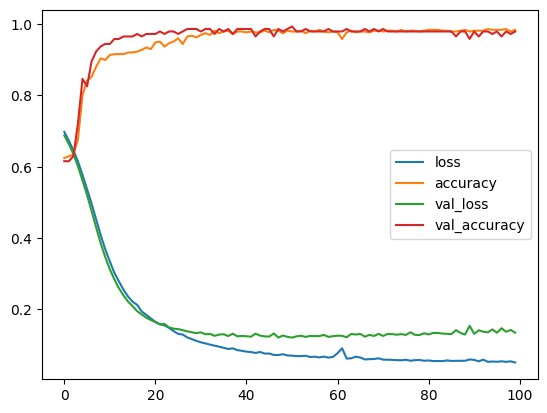

In [437]:
los =  pd.DataFrame(model.history.history)
los.plot()

In [454]:
df.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label_encoding
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


In [459]:
# row.drop(columns=['diagnosis','Unnamed: 32'],inplace=True)
# 
raw = X.iloc[1]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
layers_dims = [15, 10, 5, 1]
X_train_transposed = X_train.T
y_train_transposed = y_train.values.reshape(1, -1)
X_train_transposed.shape
y_train_transposed.shape

(1, 455)

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []  
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X,parameters)
        m = Y.shape[1]
        AL = np.clip(AL, 1e-10, 1 - 1e-10)
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

        cost = np.squeeze(cost)
    
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
parameters, costs = L_layer_model(X_train_transposed, y_train_transposed, layers_dims, num_iterations = 2, print_cost = True)

Cost after iteration 0: -8.60306515156377
Cost after iteration 1: -8.60306515156377


NameError: name 'learning_rate' is not defined

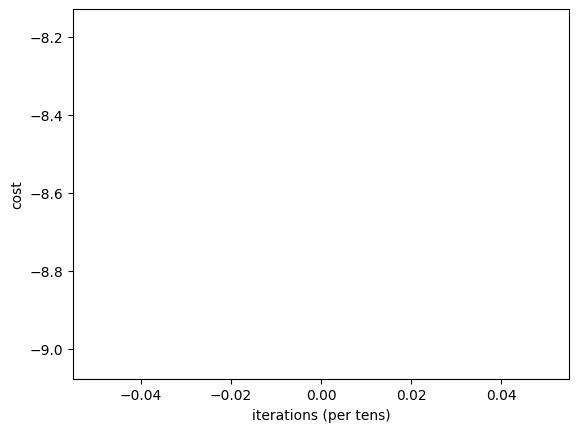

In [ ]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()